In [220]:
pip install openrouteservice

In [221]:
import numpy as np
import random
import pandas as pd
import openrouteservice as ors
import matplotlib.pyplot as plt
import io
pd.set_option('display.max_colwidth',1000)

In [222]:
places_name = ["Victoria Memorial",
        "Birla Planetarium",
        "St Paul's Cathedral",
        "ISCON Kolkata",
        "Rabindra Sarovar", 
        "Princep Ghat",
        "St. Johns Church",
        "Biswa Bangla Gate",
        "Tagore House",
        "Marble Palace",
        "Maidan",
        "Eden Garden",
        "Salt Lake Stadium",
        "National Library",
        "Alipore zoo",
        "Gariahat Market",
        "Birla Industrial and Tech Museum",
        "Quest Mall",
        "New Market",
        "Dakshineswar Kali Temple",
        "Park Street",
        "College Street",
        "Science City",
        "Mother House",
        "Kalighat Temple",
        "Netaji Bhavan",
        "Nicco Park",
        "Eco Park",
        "Mother Teresa Wax Museum",
        "Indian Museum"]

In [223]:
print("List of places to visit in Kolkata:")
for i,k in enumerate(places_name):
  print( str(i + 1)  +". " + k)

List of places to visit in Kolkata:
1. Victoria Memorial
2. Birla Planetarium
3. St Paul's Cathedral
4. ISCON Kolkata
5. Rabindra Sarovar
6. Princep Ghat
7. St. Johns Church
8. Biswa Bangla Gate
9. Tagore House
10. Marble Palace
11. Maidan
12. Eden Garden
13. Salt Lake Stadium
14. National Library
15. Alipore zoo
16. Gariahat Market
17. Birla Industrial and Tech Museum
18. Quest Mall
19. New Market
20. Dakshineswar Kali Temple
21. Park Street
22. College Street
23. Science City
24. Mother House
25. Kalighat Temple
26. Netaji Bhavan
27. Nicco Park
28. Eco Park
29. Mother Teresa Wax Museum
30. Indian Museum


In [224]:
total_time_elapsed=0
total_distance_travelled=0

available_time = input("Enter Tour Duration in hours:")
available_time_in_mins = int(available_time) * 60

starting_node_index = int(input("Enter the index of the starting node:")) -1
starting_node=places_name[starting_node_index]

Enter Tour Duration in hours:6
Enter the index of the starting node:25


In [225]:
df=pd.read_csv(("time.csv"),skiprows=1,skipfooter=1 )
print (df)


                          Unnamed: 0  ...  Indian Museum
0                  Victoria Memorial  ...              8
1                  Birla Planetarium  ...             16
2                St Paul's Cathedral  ...             17
3                      ISCON Kolkata  ...             19
4                  Rabindra Sarovar   ...             24
5                       Princep Ghat  ...             12
6                   St. Johns Church  ...             23
7                  Biswa Bangla Gate  ...             43
8                       Tagore House  ...             23
9                      Marble Palace  ...             20
10                            Maidan  ...              6
11                       Eden Garden  ...              5
12                 Salt Lake Stadium  ...             31
13                  National Library  ...             15
14                       Alipore zoo  ...             14
15                   Gariahat Market  ...             22
16  Birla Industrial and Tech M

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [226]:
travel_time = df.iloc[:,1:].to_numpy()
travel_time

array([[ 0,  2,  2,  5, 20,  7,  7, 28, 21, 20,  2,  6, 18,  9,  8, 19,
        12, 10, 10, 51,  8, 20, 23, 10, 15, 10, 20, 30, 31,  8],
       [ 2,  0,  1,  9, 21, 12, 24, 34, 30, 28,  7, 12, 22, 10,  9, 22,
        14, 13, 15, 58, 12, 30, 24, 35, 13, 11, 22, 34, 35, 16],
       [ 2,  1,  0, 10, 22, 13, 25, 35, 31, 29,  8, 13, 23, 11, 10, 23,
        15, 14, 16, 29, 13, 30, 25, 36, 14, 12, 23, 35, 36, 17],
       [ 5,  9, 10,  0, 23, 17, 21, 42, 34, 29,  5, 17, 31, 17, 15, 22,
        11, 11, 20, 72,  6, 27, 27, 10, 19, 12, 30, 44, 45, 19],
       [20, 21, 22, 23,  0, 27, 34, 50, 46, 44, 23, 27, 36, 25, 25,  9,
        12, 16, 32, 87, 22, 39, 35, 24, 15, 18, 37, 51, 53, 24],
       [ 7, 12, 13, 17, 27,  0,  8, 44, 27, 24,  8,  6, 33, 12, 10, 29,
        20, 17, 14, 69, 16, 24, 32, 18, 19, 16, 31, 45, 47, 12],
       [ 7, 24, 25, 21, 34,  8,  0, 13, 38, 26, 64,  5, 24, 10, 11, 25,
        17, 15, 14, 15, 12, 27, 26, 17, 15, 14, 25, 44, 44, 23],
       [28, 34, 35, 42, 50, 44, 13,  0, 4

In [227]:
df1=pd.read_csv("survey.csv")
#print(df1)
visit_time=df1.iloc[:,1:].to_numpy()
print(visit_time)

[[ 90]
 [ 60]
 [ 60]
 [ 60]
 [ 60]
 [ 60]
 [ 30]
 [ 60]
 [ 60]
 [ 30]
 [ 30]
 [ 60]
 [ 30]
 [ 60]
 [120]
 [ 30]
 [ 90]
 [ 60]
 [ 60]
 [ 60]
 [ 60]
 [ 60]
 [120]
 [ 60]
 [ 30]
 [ 30]
 [120]
 [120]
 [ 90]
 [ 90]]


In [228]:
df2=pd.read_csv(("distance.csv"),skiprows=1,skipfooter=2 )
distance = df2.iloc[:,1:].to_numpy()
print (distance)

[[ 0.    0.65  0.7   1.3   5.4   3.5  13.2  17.7   5.2   5.2   0.6   2.8
  11.    2.8   2.4   6.7   3.7   4.    2.9  16.    2.2   4.4   9.    3.3
   3.8   2.5  12.4  19.1  19.2   1.9 ]
 [ 0.65  0.    0.17  1.    5.8   5.1   4.9  16.    7.5   4.9   1.7   2.7
  10.    3.3   2.5   5.1   2.9   2.8   2.   15.    1.3   4.    6.4   0.9
   3.3   1.7  10.   19.   20.1   1.6 ]
 [ 0.7   0.17  0.    1.1   6.    5.2   4.6  15.    5.9   4.9   1.8   2.7
  10.    3.4   2.6   5.2   2.9   2.8   2.   15.    1.5   4.1   6.4   3.
   3.7   1.7  10.   19.   19.    1.7 ]
 [ 1.3   1.    1.1   0.    4.9   4.2   4.3  16.    6.6   5.6   1.3   3.4
   9.3   3.5   3.    4.4   2.1   2.2   2.1  16.    1.    4.    7.1   2.2
   3.5   1.9  11.   17.   18.    2.9 ]
 [ 5.4   5.8   6.    4.9   0.    8.4   8.4  18.   12.    9.3   5.8   9.4
  12.    5.9   6.1   2.    4.2   3.5   6.5  19.    5.9   8.6   9.8   6.3
   3.2   4.3  13.   20.   20.    6.9 ]
 [ 3.5   5.1   5.2   4.2   8.4   0.    5.7  18.    5.8   5.4   4.4   2.2
  1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [229]:
# Global Variables
chromosomes_list = []
visit_time_list = []
travel_time_list = []
distance_covered_list = []
number_of_spots_list = []

In [230]:
def new_pop(n):
  print("Starting place is " + starting_node)
  global chromosomes_list
  global visit_time_list
  global travel_time_list
  global distance_covered_list
  global number_of_spots_list

  chromosomes_list = []
  visit_time_list = []
  travel_time_list = []
  distance_covered_list = []
  number_of_spots_list = []
  while len(chromosomes_list) < n:
    vt=0
    tt=0
    dc=0
    total_time_elapsed = 0

    places_list = []

    vt = int(visit_time[starting_node_index][0])
    total_time_elapsed = total_time_elapsed + vt

    places_list.append(starting_node)
    next_place = starting_node

    while(available_time_in_mins >= total_time_elapsed):
      prev_place = next_place
      prev_place_index=places_name.index(prev_place)
    
      next_place = random.choice(places_name) #randomly choosing new place
      next_place_index = places_name.index(next_place)

      while(next_place in places_list):
        #while next place is not unique --->choose another
        next_place = random.choice(places_name)
        next_place_index = places_name.index(next_place)
      
      if(next_place not in places_list):
        places_list.append(next_place)
        tt = tt + int(travel_time[prev_place_index][next_place_index])
        vt = vt + int(visit_time[next_place_index][0])
        dc = dc + int(distance[prev_place_index][next_place_index])
        total_time_elapsed = total_time_elapsed + int(visit_time[next_place_index][0]) + int(travel_time[prev_place_index][next_place_index])
  
    #deleting the excess element
    if(total_time_elapsed > available_time_in_mins):
      del(places_list[-1])
      tt = tt - int(travel_time[prev_place_index][next_place_index])
      vt = vt - int(visit_time[next_place_index][0])
      dc = dc - int(distance[prev_place_index][next_place_index])
      total_time_elapsed = total_time_elapsed - int(visit_time[next_place_index][0]) - int(travel_time[prev_place_index][next_place_index])

    if places_list not in chromosomes_list:
      chromosomes_list.append( places_list )
      visit_time_list.append(vt)
      travel_time_list.append(tt)
      distance_covered_list.append(dc)
      number_of_spots_list.append(len(places_list))

  X = np.column_stack([distance_covered_list,travel_time_list,visit_time_list,number_of_spots_list  ])

  dist = list(np.array(distance_covered_list))
  #dist=list(-dist)
  tt=list(np.array(travel_time_list))
  #tt=list(-tt)
  vt=np.array(visit_time_list)
  vt=list(vt)
  nspots=np.array(number_of_spots_list)
  nspots=list(nspots)

  X = np.column_stack([dist,tt,vt,nspots])

  return X

In [231]:
# This project is extended and a library called PyGAD is released to build the genetic algorithm.
# PyGAD documentation: https://pygad.readthedocs.io
# Install PyGAD: pip install pygad
# PyGAD source code at GitHub: https://github.com/ahmedfgad/GeneticAlgorithmPython

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function caulcuates the sum of products between each input and its corresponding weight.
    fitness = np.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = np.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = np.where(fitness == np.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999

    return parents

def crossover(parents, offspring_size):
    offspring = np.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually it is at the center.
    crossover_point = np.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover):
    # Mutation changes a single gene in each offspring randomly.
    for idx in range(offspring_crossover.shape[0]):
        # The random value to be added to the gene.
        random_value = np.random.uniform(-1.0, 1.0, 1)
        offspring_crossover[idx, 3] = offspring_crossover[idx, 3] + random_value
    return offspring_crossover

The y=target is to maximize this equation: y = w1x1+w2x2+w3x3+w4x4+w5x5+6wx6 where (x1,x2,x3,x4,x5,x6)=(4,-2,3.5,5,-11,-4.7) What are the best values for the 6 weights w1 to w6? We are going to use the genetic algorithm for the best possible values after a number of generations.

In [232]:
# Inputs of the equation.
equation_inputs = [-1,-1,1,1]

In [233]:
# Number of the weights we are looking to optimize.
num_weights = 4


Genetic algorithm parameters:
    Mating pool size,
    Population size


In [234]:
sol_per_pop = 30
num_parents_mating = 4

In [235]:
# Defining the population size.
pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.
#Creating the initial population.
print(" Popultion size is" + str(pop_size))
new_population = new_pop(sol_per_pop)
data = np.array([chromosomes_list, distance_covered_list,travel_time_list,visit_time_list,number_of_spots_list  ])
df = pd.DataFrame(data.T,columns =['Names','Distance','Travel Time','Visit Time','Spots Visited'])
df

 Popultion size is(30, 4)
Starting place is Kalighat Temple


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


,Names,Distance,Travel Time,Visit Time,Spots Visited
0,"[Kalighat Temple, Park Street, Nicco Park, College Street]",25,70,270,4
1,"[Kalighat Temple, Quest Mall, Netaji Bhavan, St Paul's Cathedral, Tagore House]",12,72,240,5
2,"[Kalighat Temple, New Market, Indian Museum, Alipore zoo]",9,42,300,4
3,"[Kalighat Temple, Indian Museum, Netaji Bhavan, Quest Mall, Princep Ghat]",19,63,270,5
4,"[Kalighat Temple, Science City, College Street]",16,60,210,3
5,"[Kalighat Temple, Rabindra Sarovar, ISCON Kolkata, St. Johns Church, Maidan]",17,123,210,5
6,"[Kalighat Temple, Maidan, Birla Planetarium, Park Street, Tagore House]",11,60,240,5
7,"[Kalighat Temple, Park Street, Dakshineswar Kali Temple, Biswa Bangla Gate]",54,105,210,4
8,"[Kalighat Temple, Maidan, Netaji Bhavan, National Library, St Paul's Cathedral, Birla Industrial and Tech Museum]",14,57,300,6
9,"[Kalighat Temple, National Library, Mother House, Salt Lake Stadium, Princep Ghat]",26,80,240,5


In [236]:
def normalize(X):
  data = X
  df_without_palces_names = pd.DataFrame(X,columns =['Distance','Travel Time','Visit Time','Spots Visited'])
  normalized_df=df_without_palces_names/df_without_palces_names.max()
  normalized_visit_time_list = np.array(normalized_df['Visit Time'])
  normalized_travel_time_list = np.array(normalized_df['Travel Time'])
  normalized_distance_covered_list = np.array(normalized_df['Distance'])
  normalized_number_of_spots_list = np.array(normalized_df['Spots Visited'])
  return np.array(normalized_df)

In [237]:
num_generations = 500
fitness_list = []
def compareFloatNum(a, b):
  temp_list = []
  for i in range(len(a)):
    if (abs(a[i] - b[i]) < 1e-9):
        temp_list.append(True)
    else:
        temp_list.append(False)
  return temp_list

normalized_pop = normalize(new_population)

for generation in range(num_generations):

    print("\nGeneration : ", generation)
    # Measing the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, normalized_pop)
    print("Fitness values:", fitness)
    
    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(normalized_pop, fitness, 
                                      num_parents_mating)
    print("Selected parents:", parents)
    
    parents_chromosomes_list = []
    parents_visit_time_list = []
    parents_travel_time_list = []
    parents_distance_covered_list = []
    parents_number_of_spots_list = []

    for i in range(len(parents)):
      for j in range(len(normalized_pop)):
        if np.all( compareFloatNum( parents[i], normalized_pop[j])):
          parents_chromosomes_list.append(chromosomes_list[j])
          parents_visit_time_list.append(visit_time_list[j])
          parents_travel_time_list.append(travel_time_list[j])
          parents_distance_covered_list.append(distance_covered_list[j])
          parents_number_of_spots_list.append(number_of_spots_list[j])
          break;
    


    # Creating the new population based on the parents and offspring.
    normalized_pop[0:parents.shape[0], :] = parents
    X=normalize(new_pop(sol_per_pop - parents.shape[0]))
    
    normalized_pop[parents.shape[0]:, :] = X
    chromosomes_list[:0] = parents_chromosomes_list
    visit_time_list[:0] = parents_visit_time_list
    travel_time_list[:0] = parents_travel_time_list
    distance_covered_list[:0] = parents_distance_covered_list
    number_of_spots_list[:0] = parents_number_of_spots_list
    
    print(chromosomes_list)
    print(normalized_pop)

    # The best result in the current iteration.
    fitness_result=np.max(np.sum(normalized_pop*equation_inputs, axis=1))
    print("Best result: ", fitness_result)
    fitness_list.append(fitness_result)


Streaming output truncated to the last 5000 lines.
 [0.24590164 0.57777778 0.8        1.        ]
 [0.26229508 0.43703704 1.         1.        ]
 [0.6557377  0.83703704 0.6        0.5       ]
 [0.29508197 0.38518519 0.8        0.66666667]
 [0.59016393 0.68148148 0.8        0.5       ]
 [0.45901639 0.65185185 0.8        0.83333333]
 [0.26229508 0.4        0.9        0.66666667]
 [0.68852459 0.75555556 0.8        0.5       ]
 [0.62295082 0.63703704 0.9        0.66666667]
 [0.44262295 0.66666667 0.9        1.        ]
 [0.68852459 0.54074074 0.7        0.66666667]
 [0.39344262 0.62222222 0.8        0.66666667]
 [0.19672131 0.27407407 1.         0.83333333]
 [0.3442623  0.60740741 0.9        1.        ]
 [0.19672131 0.39259259 0.9        0.66666667]]
Best result:  1.6904477611940298

Generation :  387
Fitness values: [ 1.69044776  1.65169231  1.64804965  1.64567164 -0.46666667  0.02835458
  0.47692775  0.48020644  0.64565877  0.01839709  0.8058895   0.65476624
  0.80752884 -0.25039466  0.7

In [238]:
print(fitness_list)

[1.48592132505176, 1.48592132505176, 1.48592132505176, 1.48592132505176, 1.48592132505176, 1.48592132505176, 1.48592132505176, 1.48592132505176, 1.48592132505176, 1.4885353095030514, 1.4885353095030514, 1.4885353095030514, 1.4885353095030514, 1.4885353095030514, 1.4885353095030514, 1.4885353095030514, 1.4885353095030514, 1.4885353095030514, 1.4885353095030514, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.642300194931774, 1.64230019

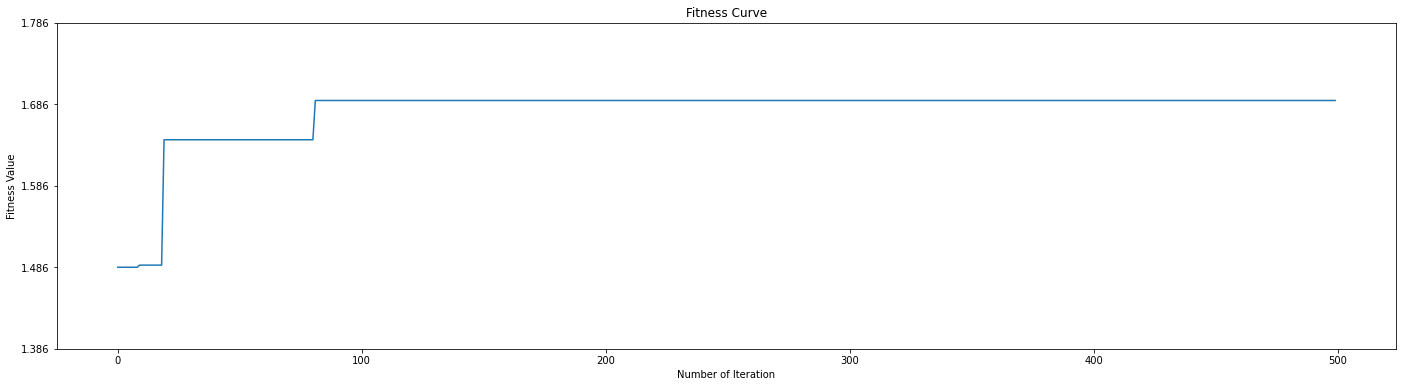

In [239]:
plt.figure(figsize=(24,6))

plt.plot(range(0, num_generations), fitness_list)
plt.xticks(np.arange(0, len(range(0, num_generations))+5, 100))
plt.yticks(np.arange(min(fitness_list) - 0.1, max(fitness_list) + 0.1, 0.1))

plt.title("Fitness Curve")
plt.xlabel("Number of Iteration")
plt.ylabel("Fitness Value")

plt.show()

In [259]:
sol_distance_covered_list = parents_distance_covered_list
sol_travel_time_list = parents_travel_time_list
sol_visit_time_list = parents_visit_time_list
sol_number_of_spots_list = parents_number_of_spots_list
best_sol_chromosomes_list = parents_chromosomes_list

print(sol_distance_covered_list)
print(sol_travel_time_list)
print(sol_number_of_spots_list)

data = np.array([best_sol_chromosomes_list, sol_distance_covered_list, sol_travel_time_list, sol_visit_time_list, sol_number_of_spots_list])
df = pd.DataFrame(data.T, columns=['Names','Distance','Travel Time','Visit Time','Spots Visited'])
df

[6, 6, 5, 8]
[33, 32, 39, 32]
[5, 5, 6, 5]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  # This is added back by InteractiveShellApp.init_path()


,Names,Distance,Travel Time,Visit Time,Spots Visited
0,"[Kalighat Temple, National Library, ISCON Kolkata, Victoria Memorial, Maidan]",6,33,270,5
1,"[Kalighat Temple, Victoria Memorial, Indian Museum, Maidan, Park Street]",6,32,300,5
2,"[Kalighat Temple, Netaji Bhavan, ISCON Kolkata, Victoria Memorial, Maidan, Birla Planetarium]",5,39,300,6
3,"[Kalighat Temple, St Paul's Cathedral, Alipore zoo, National Library, Maidan]",8,32,300,5


In [241]:
#dominance among the elites
X = np.column_stack([ sol_distance_covered_list, sol_travel_time_list, sol_visit_time_list, sol_number_of_spots_list])

#print(X)

def dominates(X1, X2):
    if(np.any(X1 < X2) and np.all(X1 <= X2)):
        return True
    else:
        return False

# Distance is minimized
# Travel time is minimized
# Visit time is maximized
# Number of spots is maximized
dist = np.array(sol_distance_covered_list)
tt=np.array(sol_travel_time_list)
vt=np.array(sol_visit_time_list)
vt=-vt
nspots=np.array(sol_number_of_spots_list)
nspots=-nspots

X = np.column_stack([dist,tt,vt,nspots])

dominantX=[]
dom_chromosomes_list=[]
temp=[]

flag = -1

for i in range(len(X)):
  flag=0
  for j in range(len(X)):
   if dominates(X[j], X[i]):
     flag=-1
     break
  if flag == 0:
    dominantX.append(X[i])
    dom_chromosomes_list.append(chromosomes_list[i])

dominantX=np.array(dominantX)
#print(dominantX)

for i in dominantX:
  i[2]=-i[2]
  i[3]=-i[3]



temp1 = []
temp2 = []
for i in range(len(dom_chromosomes_list)):
    if dom_chromosomes_list[i] not in temp1:
      temp1.append(dom_chromosomes_list[i])
      temp2.append(dominantX[i])
dom_chromosomes_list=temp1
dominantX=np.array(temp2)

In [242]:
best_routes=dom_chromosomes_list

In [243]:
dom_distance_covered_list = []
dom_travel_time_list = []
dom_visit_time_list = []
dom_number_of_spots_list = []


for i in dominantX:
  dom_distance_covered_list.append(i[0])
  dom_travel_time_list.append(i[1])
  dom_visit_time_list.append(i[2])
  dom_number_of_spots_list.append(i[3])
data = np.array([dom_chromosomes_list, dom_distance_covered_list, dom_travel_time_list, dom_visit_time_list, dom_number_of_spots_list])
df = pd.DataFrame(data.T, columns=['Names','Distance','Travel Time','Visit Time','Spots Visited'])
df
#Non dominant elites

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  if sys.path[0] == '':


,Names,Distance,Travel Time,Visit Time,Spots Visited
0,"[Kalighat Temple, Victoria Memorial, Indian Museum, Maidan, Park Street]",6,32,300,5
1,"[Kalighat Temple, Netaji Bhavan, ISCON Kolkata, Victoria Memorial, Maidan, Birla Planetarium]",5,39,300,6


In [244]:
non_dominant_optimal_pop = np.column_stack([dom_distance_covered_list,dom_travel_time_list,dom_visit_time_list,dom_number_of_spots_list])

In [245]:
best_match_idx = np.where(abs(fitness - np.max(fitness) ) < 1e-9)
fitness

array([-1.00000000e+11, -1.00000000e+11, -1.00000000e+11, -1.00000000e+11,
        1.15373818e+00,  1.16773472e+00, -1.86684976e-01, -5.89655172e-01,
       -2.96714475e-02, -4.71498322e-01,  6.65110365e-01,  5.90865629e-01,
        6.92238836e-01,  6.16498830e-01,  3.96531380e-01,  4.89716204e-01,
       -8.42640627e-02,  4.55467399e-01,  3.05380938e-01,  4.82697589e-01,
        8.63991456e-01,  7.15481640e-01,  3.71915370e-01, -4.80235988e-01,
        9.56952497e-01, -2.76808056e-01,  4.76177398e-01, -5.27250534e-01,
        2.97650290e-01,  2.69758926e-02])

In [246]:
# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs,normalize(non_dominant_optimal_pop))
# Then return the index of that solution corresponding to the best fitness.

  
best_match_idx = np.where(abs(fitness - np.max(fitness) ) < 1e-9)

#print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

best_sol = non_dominant_optimal_pop[best_match_idx, :]
#best_sol = best_sol[0]
best_sol_chromosomes_list = []

for i in range(len(non_dominant_optimal_pop)):
  if np.all(best_sol == non_dominant_optimal_pop[i]):
    best_sol_chromosomes_list.append(dom_chromosomes_list[i])

print("My best solution:", best_sol)
print("My best chromosomes list:", best_sol_chromosomes_list)

Best solution fitness :  [0.16666667]
My best solution: [[[  5  39 300   6]]]
My best chromosomes list: [['Kalighat Temple', 'Netaji Bhavan', 'ISCON Kolkata', 'Victoria Memorial', 'Maidan', 'Birla Planetarium']]


In [247]:
sol_distance_covered_list = []
sol_travel_time_list = []
sol_visit_time_list = []
sol_number_of_spots_list = []
print(best_sol_chromosomes_list)
best_sol = best_sol[0]
for i in best_sol:
  sol_distance_covered_list.append(i[0])
  sol_travel_time_list.append(i[1])
  sol_visit_time_list.append(i[2])
  sol_number_of_spots_list.append(i[3])

data = np.array([best_sol_chromosomes_list, sol_distance_covered_list, sol_travel_time_list, sol_visit_time_list, sol_number_of_spots_list])
df = pd.DataFrame(data.T, columns=['Names','Distance','Travel Time','Visit Time','Spots Visited'])
df
#recommended path

[['Kalighat Temple', 'Netaji Bhavan', 'ISCON Kolkata', 'Victoria Memorial', 'Maidan', 'Birla Planetarium']]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  del sys.path[0]


,Names,Distance,Travel Time,Visit Time,Spots Visited
0,"[Kalighat Temple, Netaji Bhavan, ISCON Kolkata, Victoria Memorial, Maidan, Birla Planetarium]",5,39,300,6


In [248]:
recommended_route=best_sol_chromosomes_list

In [249]:
print(recommended_route)
print(best_routes)

[['Kalighat Temple', 'Netaji Bhavan', 'ISCON Kolkata', 'Victoria Memorial', 'Maidan', 'Birla Planetarium']]
[['Kalighat Temple', 'Victoria Memorial', 'Indian Museum', 'Maidan', 'Park Street'], ['Kalighat Temple', 'Netaji Bhavan', 'ISCON Kolkata', 'Victoria Memorial', 'Maidan', 'Birla Planetarium']]


In [250]:
import folium
import pandas

In [251]:
data = pandas.read_csv("coord.csv")
lat = list(data["LAT"])
lon = list(data["LONG"])
location = list(data["LOCATION"])
data

,LOCATION,LAT,LONG
0,Victoria Memorial,22.545001,88.342628
1,Birla Planetarium,22.545722,88.347778
2,St Paul's Cathedral,22.544471,88.347208
3,ISCON Kolkata,22.544345,88.353617
4,Rabindra Sarovar,22.512388,88.363697
5,Princep Ghat,22.555518,88.331435
6,St. Johns Church,22.571279,88.346004
7,Biswa Bangla Gate,22.578653,88.471905
8,Tagore House,22.585541,88.359124
9,Marble Palace,22.582484,88.360359


In [252]:
fg=folium.FeatureGroup(name="My Map")

for lt, ln, loc in zip(lat, lon, location):
    fg.add_child(folium.Marker(location=[lt, ln], popup= loc, icon=folium.Icon(color='darkblue', icon='thumb-tack', prefix='fa')))

In [253]:
client = ors.Client(key='5b3ce3597851110001cf62482ebf88c9257446b39ecc1e2d47b032df')

In [254]:
map = folium.Map(location=(22.55443963, 88.35131118), zoom_start=15, tiles="Open Street Map")
map.add_child(fg)

In [255]:
fg0=folium.FeatureGroup(name="Recommended Route")

points00 = recommended_route[0]

for i in range(len(points00)):
  j=points00[i]
  fg0.add_child(folium.Marker(location=[lat[location.index(j)], lon[location.index(j)]], popup= j , icon=folium.Icon(color='darkblue', icon='thumb-tack', prefix='fa')))
  j=""


In [256]:
for i in range(len(points00)):
  j=points00[i]
  k=points00[i-1]
  coordinates=[[lon[location.index(j)], lat[location.index(j)]] , [lon[location.index(k)], lat[location.index(k)]]] 
  route = client.directions(
    coordinates=coordinates,
    profile='foot-walking',
    format='geojson',
    options={"avoid_features": ["steps"]},
    validate=False,
  )
  folium.PolyLine(locations=[list(reversed(coord)) 
                           for coord in 
                           route['features'][0]['geometry']['coordinates']],color="black").add_to(fg0)
                          
map.add_child(fg0) 

In [257]:
for i in range(len(best_routes)):

  fg1=folium.FeatureGroup(name="Route "+str(i))

  points = best_routes[i]

  for i in range(len(points)):
    j=points[i]
    fg1.add_child(folium.Marker(location=[lat[location.index(j)], lon[location.index(j)]], popup= j , icon=folium.Icon(color='darkblue', icon='thumb-tack', prefix='fa')))
    j=""

  for i in range(len(points)):
    j=points[i]
    k=points[i-1]
    coordinates=[[lon[location.index(j)], lat[location.index(j)]] , [lon[location.index(k)], lat[location.index(k)]]] 
    route = client.directions(
      coordinates=coordinates,
      profile='foot-walking',
      format='geojson',
      options={"avoid_features": ["steps"]},
      validate=False,
    )
    folium.PolyLine(locations=[list(reversed(coord)) 
                            for coord in 
                            route['features'][0]['geometry']['coordinates']],color="red").add_to(fg1)
                          
  map.add_child(fg1)

map.add_child(folium.LayerControl())

In [258]:
map.save("Map.html")